In [1]:
from sklearn.datasets import make_regression
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Rozszerzyć Zad 1) na przypadek dwuwymiarowy (wyliczana i wizualizowana będzie płaszczyzna). Nie uwzględniać wprowadzania danych wizualnie.

c. Dane

- zadawać tablicą w kodzie [[x1, y1, z1], [x2, y2, z2], ..., [xn, yn, zn]]

In [2]:
x = [random.uniform(-5, 5) for _ in range(10)]
y = [random.uniform(-5, 5) for _ in range(10)]
z = lambda x, y: x ** 2 + y ** 2
data_array = np.array([[x_el, y_el, z(x_el, y_el)] for x_el, y_el in zip(x, y)])
data_array

array([[ 4.50574102,  0.45009652, 20.50428899],
       [ 2.01979322, -4.18379044, 21.58366712],
       [-2.90842533, -0.34533062,  8.57819115],
       [ 3.26814674,  1.39217922, 12.61894607],
       [ 3.3686241 , -1.81729346, 14.65018381],
       [ 0.42770929,  0.86406684,  0.92954674],
       [-2.89073591,  1.72570355, 11.33440686],
       [ 1.04977325, -1.72553601,  4.0794984 ],
       [-4.10976147, -0.35451679, 17.01582149],
       [-3.83951085, -2.62373904, 21.62585015]])

- generować n punktów 2D w zadanym przedziale [xmin, xmax] [ymin, ymax] (ustawić n=10, przedział [-5, 5]) według płaszczyzny z=ax+by+c+noise zaburzonej losowo (ustawić a=0.5, b=-1, c=-0.5)

In [3]:
xmin = ymin = -5
xmax = ymax = 5
n = 10
a = 0.5
b = -1
c = -0.5

def z(a, x, b, y, c, noise):
    return a * x + b * y + c + noise

def generate_along_the_plane(a, b, c, n, xmin, xmax, ymin, ymax):
    data_array = []
    xs = [random.uniform(xmin, xmax) for _ in range(n)]
    ys = [random.uniform(ymin, ymax) for _ in range(n)]
    for x, y in zip(xs, ys):
        noise = random.random()
        data_array.append([x, y, z(a, x, b, y, c, noise)])
    return np.array(data_array)

data_array = generate_along_the_plane(a, b, c, n, xmin, xmax, ymin, ymax)
data_array

array([[ 4.53755004,  2.72214126, -0.17803869],
       [-0.87945379,  4.20448996, -4.41205031],
       [ 0.45473496,  1.20346172, -1.05608286],
       [ 4.41156298,  3.62938882, -1.15534693],
       [ 2.84672943, -2.7776399 ,  4.51090347],
       [-4.52209583,  4.20395257, -6.44922145],
       [ 3.5622657 ,  1.44488412, -0.14413467],
       [ 3.65724702, -0.27674666,  1.86049892],
       [ 4.59680836,  1.52988992,  0.27415084],
       [-2.30489829,  2.74248352, -4.00412872]])

a. Hiperparametry zadawane w kodzie

- liczba epok (ustawić na 10)

In [4]:
epochs = 10

- współczynnik uczenia (ustawić na 0.05)

In [5]:
learning_rate = 0.05

b. Wizualizacja co epokę na tym samym wykresie (%matplotlib inline)

- dane
- prosta
- bieżące wartości parametrów
- wartość funkcji straty

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

x = np.array([data_array[i][0] for i in range(len(data_array))]).reshape(-1, 1)
y = np.array([data_array[i][1] for i in range(len(data_array))]).reshape(-1, 1)
z = np.array([data_array[i][2] for i in range(len(data_array))]).reshape(-1, 1)
theta_history = []
loss_function_history = []
z_pred_history = []
theta0 = [0]
theta1 = [0]
theta2 = [0]
# Wyświetlanie bieżących wartości parametrów co epokę
print('Przed wystartowaniem:\n')
print(theta0, theta1, theta2, '\n')
for epoch in range(epochs):
    z_pred = theta0 * x + theta1 * y + theta2
    z_pred_history.append(z_pred)
    curent_loss = mean_squared_error(z, z_pred)
    loss_function_history.append(curent_loss)
    theta_history.append([theta0, theta1, theta2])
    theta0_derivative = -2/len(x) * sum(x * (z - z_pred))
    theta1_derivative = -2/len(y) * sum(y * (z - z_pred))
    theta2_derivative = -2/len(x) * sum(z - z_pred)
    theta0 = theta0 - learning_rate * theta0_derivative
    theta1 = theta1 - learning_rate * theta1_derivative
    theta2 = theta2 - learning_rate * theta2_derivative
    print(f'Epoka {epoch+1}:')
    print(theta0, theta1, theta2, '\n')

Przed wystartowaniem:

[0] [0] [0] 

Epoka 1:
[0.56280717] [-0.75426094] [-0.1075345] 

Epoka 2:
[0.47975213] [-0.92446177] [-0.1559024] 

Epoka 3:
[0.51136121] [-0.95178026] [-0.1541432] 

Epoka 4:
[0.50494812] [-0.95935047] [-0.15264289] 

Epoka 5:
[0.50635731] [-0.9611603] [-0.14883334] 

Epoka 6:
[0.50547957] [-0.96232818] [-0.1452982] 

Epoka 7:
[0.50513181] [-0.96322624] [-0.14175543] 

Epoka 8:
[0.50465724] [-0.96408066] [-0.13834277] 

Epoka 9:
[0.5042306] [-0.96489686] [-0.13503459] 

Epoka 10:
[0.50380926] [-0.96568638] [-0.1318354] 



Jeśli "z" może być zaburzona losowo, to ciężko o płaszczyznę. Dodatkowo, ciężko o płaszczyznę jeśli model nie ma jeszcze zbyt dobrych predykcji.

Poniższa funkcja umożliwia przedstawienie zestawu: dane, płaszczyzna i parametry dla wybranej epoki (ale nie dla wszystkich na raz)

<IPython.core.display.Javascript object>


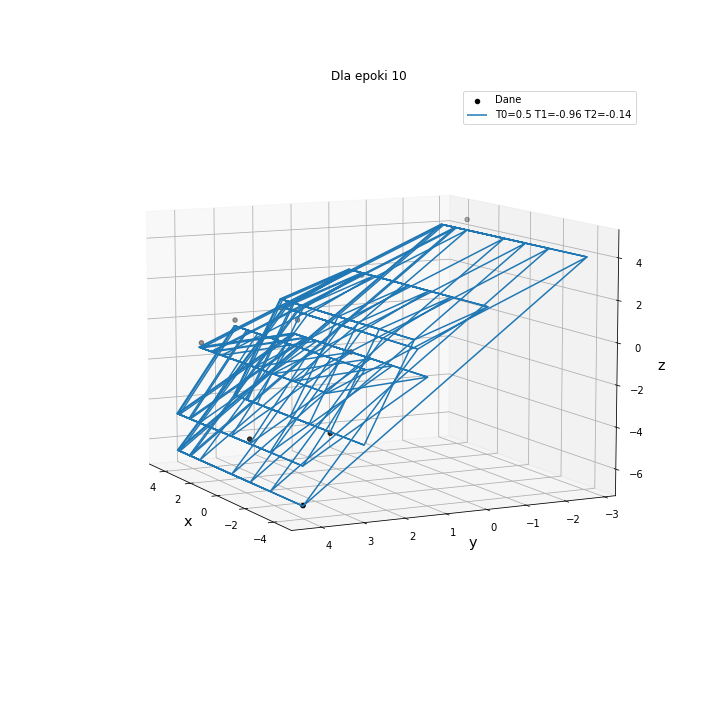

In [12]:
# umożliwia rotację grafu 3d
%matplotlib notebook 

fig = plt.figure(figsize=(10, 10))

def show_data_plane_parameters(epoch):
    global x, y, z
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x, y, z, label='Dane', color='black')
    x, y = np.meshgrid(x, y)
    ax.plot_wireframe(x, y, z_pred_history[epoch], label=f'T0={round(theta_history[epoch][0][0], 2)} T1={round(theta_history[epoch][1][0], 2)} T2={round(theta_history[epoch][2][0], 2)}')
    ax.set_xlabel('x', fontsize='x-large')
    ax.set_ylabel('y', fontsize='x-large')
    ax.set_zlabel('z', fontsize='x-large')
    ax.set_title(f'Dla epoki {epoch+1}')
    plt.legend()
    
# tutaj można wybrać interesującą nas epokę
show_data_plane_parameters(len(z_pred_history)-1)

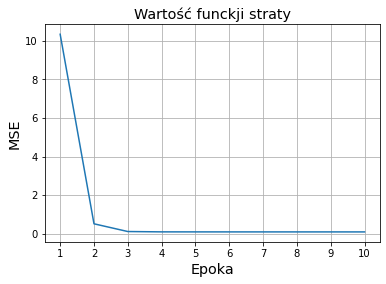

In [9]:
%matplotlib inline
plt.plot(list(range(1, epochs + 1)), loss_function_history)
plt.title('Wartość funckji straty', fontsize='x-large')
plt.xticks(np.arange(1, epochs + 1, step=1))
plt.xlabel('Epoka', fontsize='x-large')
plt.ylabel('MSE', fontsize='x-large')
plt.grid()
plt.show()